In [3]:
import cmocean.cm as cmo
from satpy import Scene, find_files_and_readers
from pyresample import create_area_def
from satpy.writers import get_enhanced_image
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from satpy import MultiScene
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr

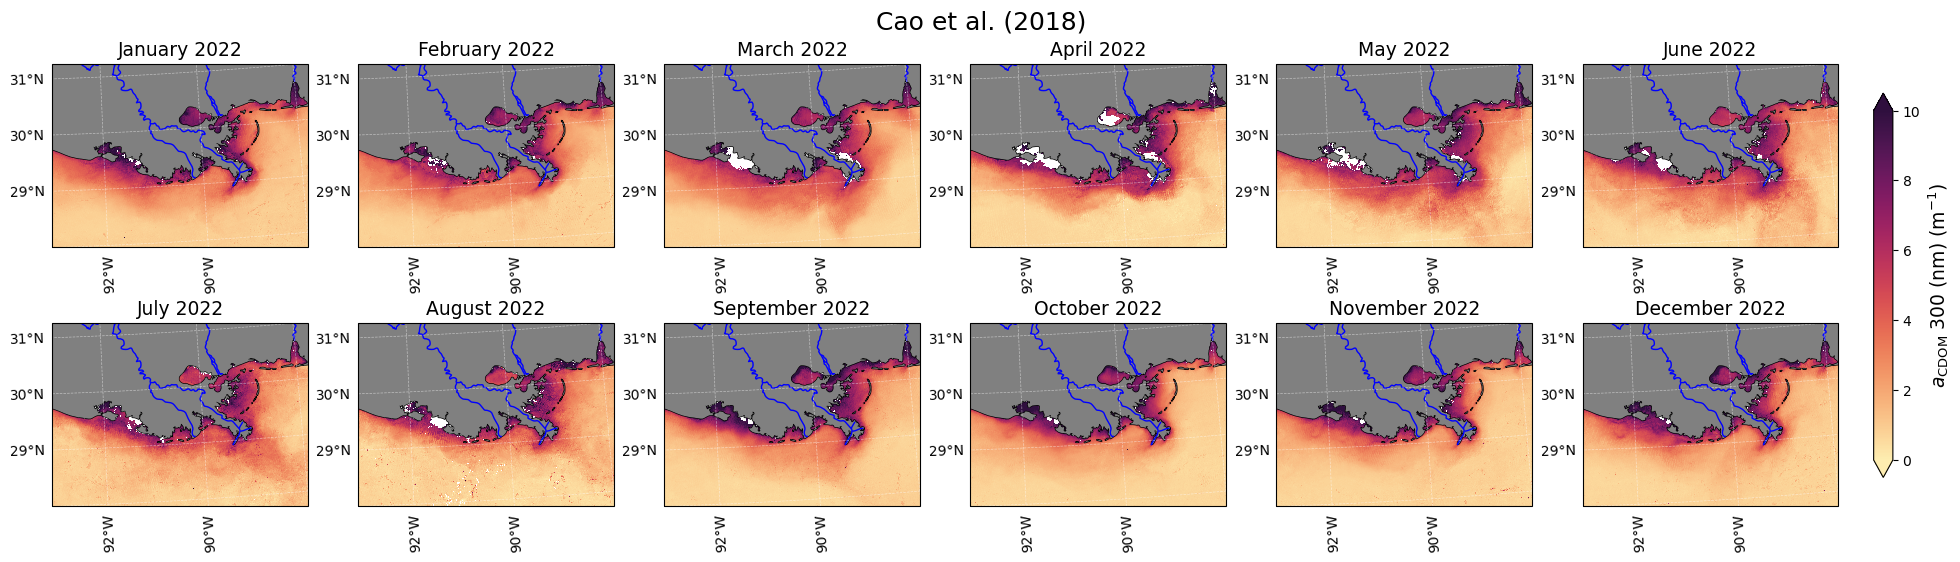

In [15]:
year = '2022'

if year == '2021':
    cfile = glob('/home/hboi-ouri/Projects/RS_Files/Task4/2021*MODIS_L2_aCDOM.nc')
    title = ['January 2021', 'February 2021', 'March 2021', 'April 2021', 'May 2021', 'June 2021',
             'July 2021', 'August 2021', 'September 2021', 'October 2021', 'November 2021', 'December 2021']
    
elif year == '2022':
    cfile = glob('/home/hboi-ouri/Projects/RS_Files/Task4/2022*MODIS_L2_aCDOM.nc')
    title = ['January 2022', 'February 2022', 'March 2022', 'April 2022', 'May 2022', 'June 2022',
         'July 2022', 'August 2022', 'September 2022', 'October 2022', 'November 2022', 'December 2022']

    
cfile.sort()

lat_top=31
lat_bot=28
lon_left=-93
lon_rigth=-88
extent=[lon_left, lon_rigth, lat_bot, lat_top]

resval = 1000 # resolution of the sat product (300 m for Sentinel and MERIS, 1 km for MODIS)
res = xr.DataArray(resval, attrs={"units": "meters"})

projection = ccrs.PlateCarree()
fig, axgr = plt.subplots(2, 6, constrained_layout=True, figsize=(19.5, 5.5),
                             subplot_kw={'projection':ccrs.LambertConformal()})
        


for i, ax in enumerate(axgr.flatten()):
    try:
        ds = xr.open_dataset(cfile[i])
        data = ds.aCDOM300.mean('time')

        im = data.where(data!=0).plot(ax=ax, vmin=0, vmax=10, 
                                      x='lon', y='lat', 
                                      add_colorbar=False,
                                     transform=ccrs.PlateCarree(),
                                     cmap=cmo.matter)
        ax.coastlines()
        ax.set_extent(extent)
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='land',
                                                    facecolor='grey', # change color here
                                                    scale='10m')) 
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='rivers_lake_centerlines',
                                                    edgecolor='blue', # change color here
                                                    facecolor='none',
                                                scale='10m'))
        gl = ax.gridlines(crs=ccrs.PlateCarree(),
             ylocs=[28, 29, 30, 31], 
             xlocs=[-94, -92, -90, -88], 
             draw_labels=True, linewidth=0.5, color='w', alpha=0.5, linestyle='--', x_inline=False, y_inline=False)
        gl.right_labels = False
        gl.top_labels = False
        ax.set_title(title[i], fontsize=13.5)
        ax.set_ylabel('Latitude')
        ax.set_xlabel('Longitude')
        
        
    except:
        ax.remove()
        pass
    
fig.suptitle('Cao et al. (2018)', size=18)
cb = fig.colorbar(im, ax=axgr, shrink=0.8, extend='both', pad=0.02)
cb.set_label('$a_{\mathrm{CDOM}}$ 300 (nm) (m$^{-1}$)', size=13.5)
fig.savefig('/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Tasks/Task7/'+ year +'YearaCDOM300.png')

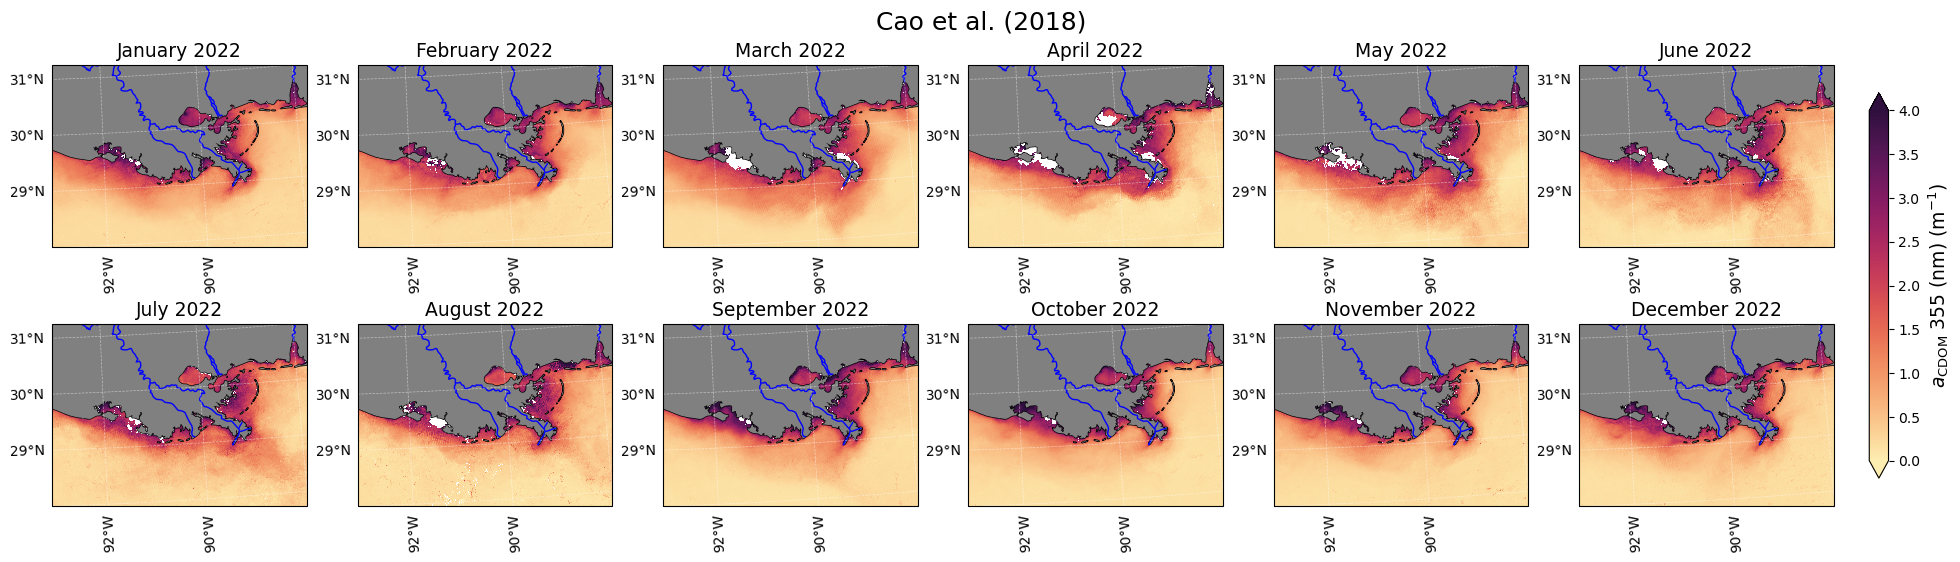

In [16]:
year = '2022'

if year == '2021':
    cfile = glob('/home/hboi-ouri/Projects/RS_Files/Task4/2021*MODIS_L2_aCDOM.nc')
    title = ['January 2021', 'February 2021', 'March 2021', 'April 2021', 'May 2021', 'June 2021',
             'July 2021', 'August 2021', 'September 2021', 'October 2021', 'November 2021', 'December 2021']
    
elif year == '2022':
    cfile = glob('/home/hboi-ouri/Projects/RS_Files/Task4/2022*MODIS_L2_aCDOM.nc')
    title = ['January 2022', 'February 2022', 'March 2022', 'April 2022', 'May 2022', 'June 2022',
         'July 2022', 'August 2022', 'September 2022', 'October 2022', 'November 2022', 'December 2022']

cfile.sort()

lat_top=31
lat_bot=28
lon_left=-93
lon_rigth=-88
extent=[lon_left, lon_rigth, lat_bot, lat_top]

resval = 1000 # resolution of the sat product (300 m for Sentinel and MERIS, 1 km for MODIS)
res = xr.DataArray(resval, attrs={"units": "meters"})

projection = ccrs.PlateCarree()
fig, axgr = plt.subplots(2, 6, constrained_layout=True, figsize=(19.5, 5.5),
                             subplot_kw={'projection':ccrs.LambertConformal()})


for i, ax in enumerate(axgr.flatten()):
    try:
        ds = xr.open_dataset(cfile[i])
        data = ds.aCDOM355.mean('time')

        im = data.where(data!=0).plot(ax=ax, vmin=0, vmax=4, 
                                      x='lon', y='lat', 
                                      add_colorbar=False,
                                     transform=ccrs.PlateCarree(),
                                     cmap=cmo.matter)
        ax.coastlines()
        ax.set_extent(extent)
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='land',
                                                    facecolor='grey', # change color here
                                                    scale='10m')) 
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='rivers_lake_centerlines',
                                                    edgecolor='blue', # change color here
                                                    facecolor='none',
                                                scale='10m'))
        gl = ax.gridlines(crs=ccrs.PlateCarree(),
             ylocs=[28, 29, 30, 31], 
             xlocs=[-94, -92, -90, -88], 
             draw_labels=True, linewidth=0.5, color='w', alpha=0.5, linestyle='--', x_inline=False, y_inline=False)
        gl.right_labels = False
        gl.top_labels = False
        ax.set_title(title[i], fontsize=13.5)
        ax.set_ylabel('Latitude')
        ax.set_xlabel('Longitude')
        
        
    except:
        ax.remove()
        pass
    
fig.suptitle('Cao et al. (2018)', size=18)
cb = fig.colorbar(im, ax=axgr, shrink=0.8, extend='both', pad=0.02)
cb.set_label('$a_{\mathrm{CDOM}}$ 355 (nm) (m$^{-1}$)', size=13.5)
fig.savefig('/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Tasks/Task7/'+ year +'YearaCDOM355.png')

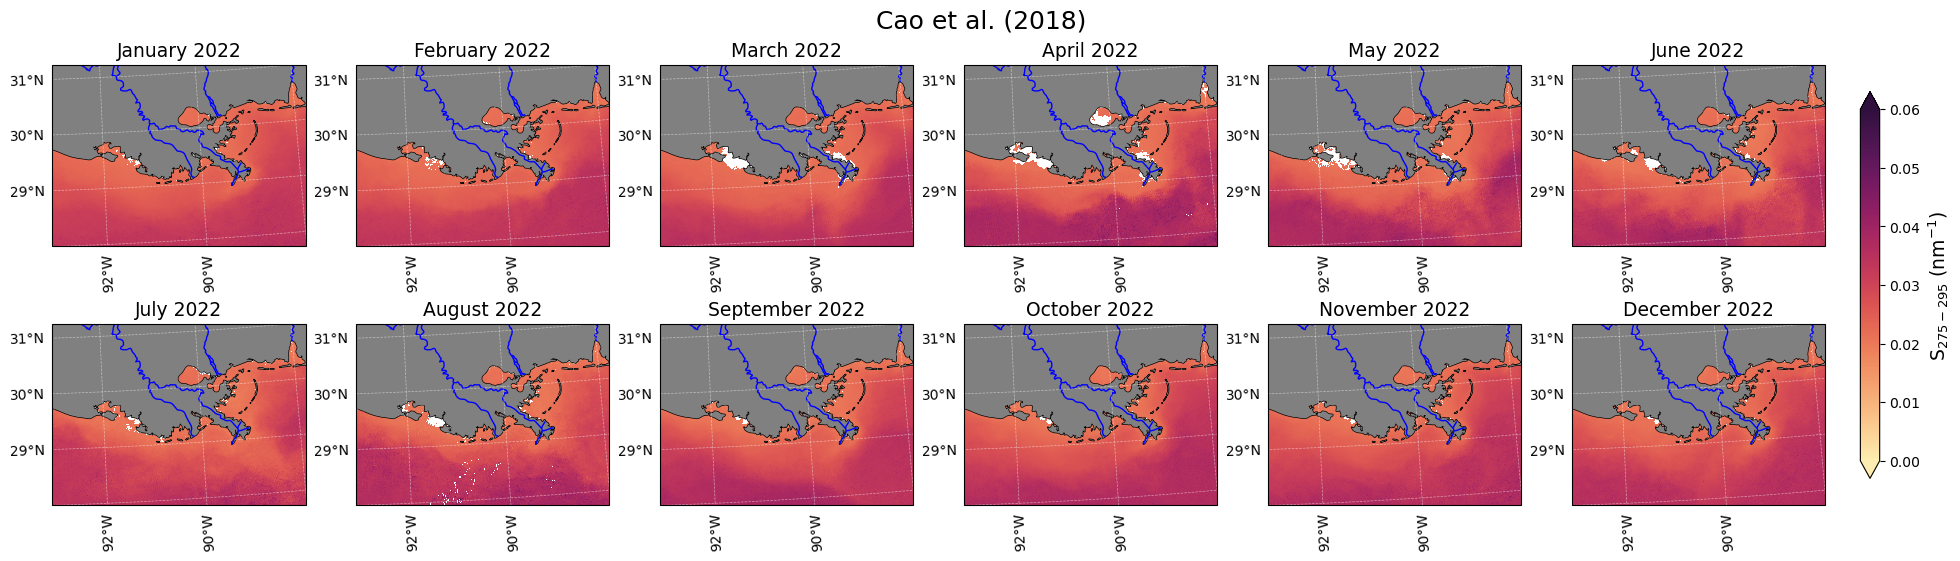

In [17]:
year = '2022'

if year == '2021':
    cfile = glob('/home/hboi-ouri/Projects/RS_Files/Task4/2021*MODIS_L2_aCDOM.nc')
    title = ['January 2021', 'February 2021', 'March 2021', 'April 2021', 'May 2021', 'June 2021',
             'July 2021', 'August 2021', 'September 2021', 'October 2021', 'November 2021', 'December 2021']
    
elif year == '2022':
    cfile = glob('/home/hboi-ouri/Projects/RS_Files/Task4/2022*MODIS_L2_aCDOM.nc')
    title = ['January 2022', 'February 2022', 'March 2022', 'April 2022', 'May 2022', 'June 2022',
         'July 2022', 'August 2022', 'September 2022', 'October 2022', 'November 2022', 'December 2022']

cfile.sort()

lat_top=31
lat_bot=28
lon_left=-93
lon_rigth=-88
extent=[lon_left, lon_rigth, lat_bot, lat_top]

resval = 1000 # resolution of the sat product (300 m for Sentinel and MERIS, 1 km for MODIS)
res = xr.DataArray(resval, attrs={"units": "meters"})

projection = ccrs.PlateCarree()
fig, axgr = plt.subplots(2, 6, constrained_layout=True, figsize=(19.5, 5.5),
                             subplot_kw={'projection':ccrs.LambertConformal()})
        

for i, ax in enumerate(axgr.flatten()):
    try:
        ds = xr.open_dataset(cfile[i])
        data = ds.S275_295.mean('time')

        im = data.where(data!=0).plot(ax=ax, vmin=0, vmax=0.06, 
                                      x='lon', y='lat', 
                                      add_colorbar=False,
                                     transform=ccrs.PlateCarree(),
                                     cmap=cmo.matter)
        ax.coastlines()
        ax.set_extent(extent)
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='land',
                                                    facecolor='grey', # change color here
                                                    scale='10m')) 
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='rivers_lake_centerlines',
                                                    edgecolor='blue', # change color here
                                                    facecolor='none',
                                                scale='10m'))
        gl = ax.gridlines(crs=ccrs.PlateCarree(),
             ylocs=[28, 29, 30, 31], 
             xlocs=[-94, -92, -90, -88], 
             draw_labels=True, linewidth=0.5, color='w', alpha=0.5, linestyle='--', x_inline=False, y_inline=False)
        gl.right_labels = False
        gl.top_labels = False
        ax.set_title(title[i], fontsize=13.5)
        ax.set_ylabel('Latitude')
        ax.set_xlabel('Longitude')
        
        
    except:
        ax.remove()
        pass
    
fig.suptitle('Cao et al. (2018)', size=18)
cb = fig.colorbar(im, ax=axgr, shrink=0.8, extend='both', pad=0.02)
cb.set_label('S$_{275-295}$ (nm$^{-1}$)', size=13.5)
fig.savefig('/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Tasks/Task7/'+ year +'YearS275_295.png')

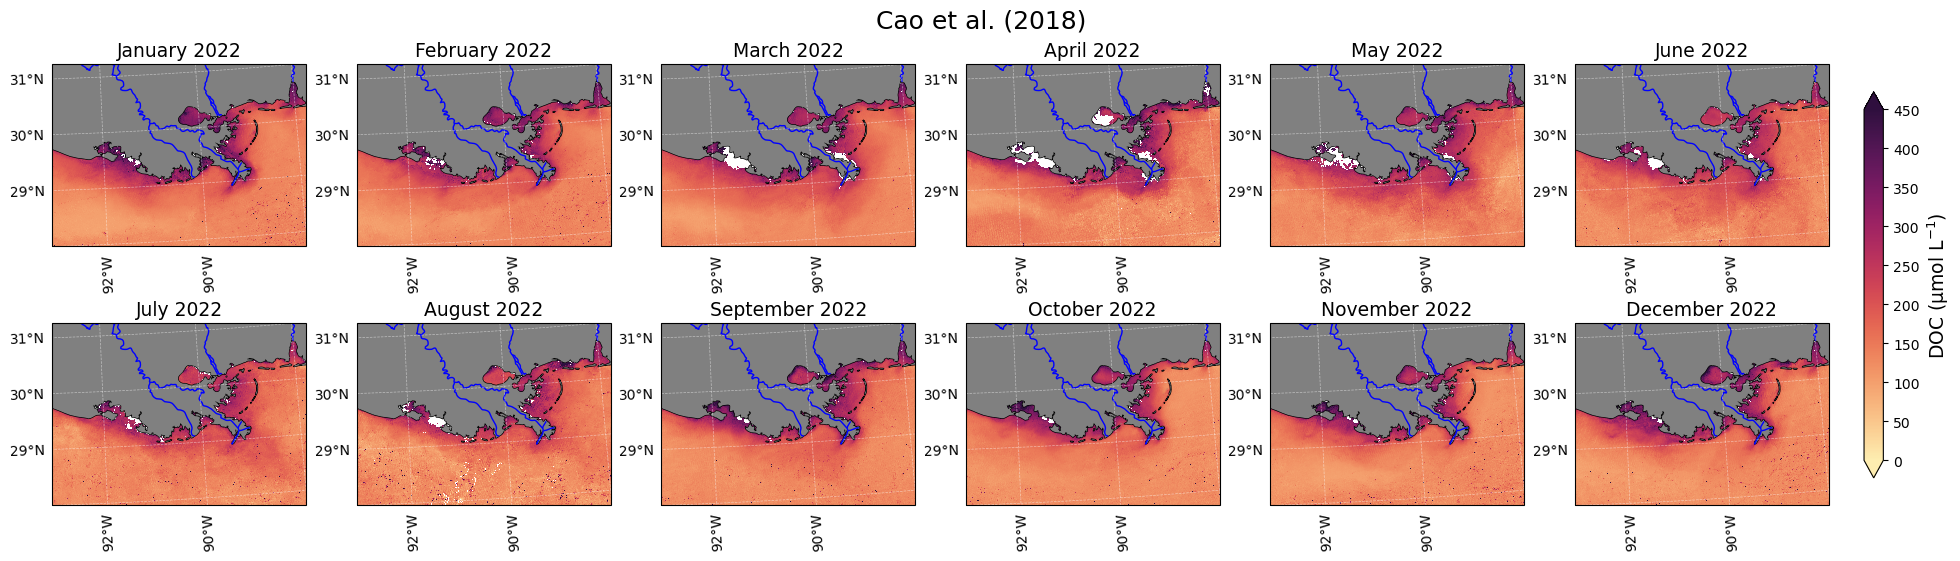

In [18]:
year = '2022'

if year == '2021':
    cfile = glob('/home/hboi-ouri/Projects/RS_Files/Task4/2021*MODIS_L2_aCDOM.nc')
    title = ['January 2021', 'February 2021', 'March 2021', 'April 2021', 'May 2021', 'June 2021',
             'July 2021', 'August 2021', 'September 2021', 'October 2021', 'November 2021', 'December 2021']
    
elif year == '2022':
    cfile = glob('/home/hboi-ouri/Projects/RS_Files/Task4/2022*MODIS_L2_aCDOM.nc')
    title = ['January 2022', 'February 2022', 'March 2022', 'April 2022', 'May 2022', 'June 2022',
         'July 2022', 'August 2022', 'September 2022', 'October 2022', 'November 2022', 'December 2022']

cfile.sort()

lat_top=31
lat_bot=28
lon_left=-93
lon_rigth=-88
extent=[lon_left, lon_rigth, lat_bot, lat_top]

resval = 1000 # resolution of the sat product (300 m for Sentinel and MERIS, 1 km for MODIS)
res = xr.DataArray(resval, attrs={"units": "meters"})

projection = ccrs.PlateCarree()
fig, axgr = plt.subplots(2, 6, constrained_layout=True, figsize=(19.5, 5.5),
                             subplot_kw={'projection':ccrs.LambertConformal()})
        

for i, ax in enumerate(axgr.flatten()):
    try:
        ds = xr.open_dataset(cfile[i])
        data = ds.DOC.mean('time')

        im = data.where(data!=0).plot(ax=ax, vmin=0, vmax=450, 
                                      x='lon', y='lat', 
                                      add_colorbar=False,
                                     transform=ccrs.PlateCarree(),
                                     cmap=cmo.matter)
        ax.coastlines()
        ax.set_extent(extent)
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='land',
                                                    facecolor='grey', # change color here
                                                    scale='10m')) 
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='rivers_lake_centerlines',
                                                    edgecolor='blue', # change color here
                                                    facecolor='none',
                                                scale='10m'))
        gl = ax.gridlines(crs=ccrs.PlateCarree(),
             ylocs=[28, 29, 30, 31], 
             xlocs=[-94, -92, -90, -88], 
             draw_labels=True, linewidth=0.5, color='w', alpha=0.5, linestyle='--', x_inline=False, y_inline=False)
        gl.right_labels = False
        gl.top_labels = False
        ax.set_title(title[i], fontsize=13.5)
        ax.set_ylabel('Latitude')
        ax.set_xlabel('Longitude')
        
        
    except:
        ax.remove()
        pass
    
fig.suptitle('Cao et al. (2018)', size=18)
cb = fig.colorbar(im, ax=axgr, shrink=0.8, extend='both', pad=0.02)
cb.set_label(u'DOC (\u03bcmol L$^{-1}$)', size=13.5)
fig.savefig('/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Tasks/Task7/'+ year +'YearDOC.png')

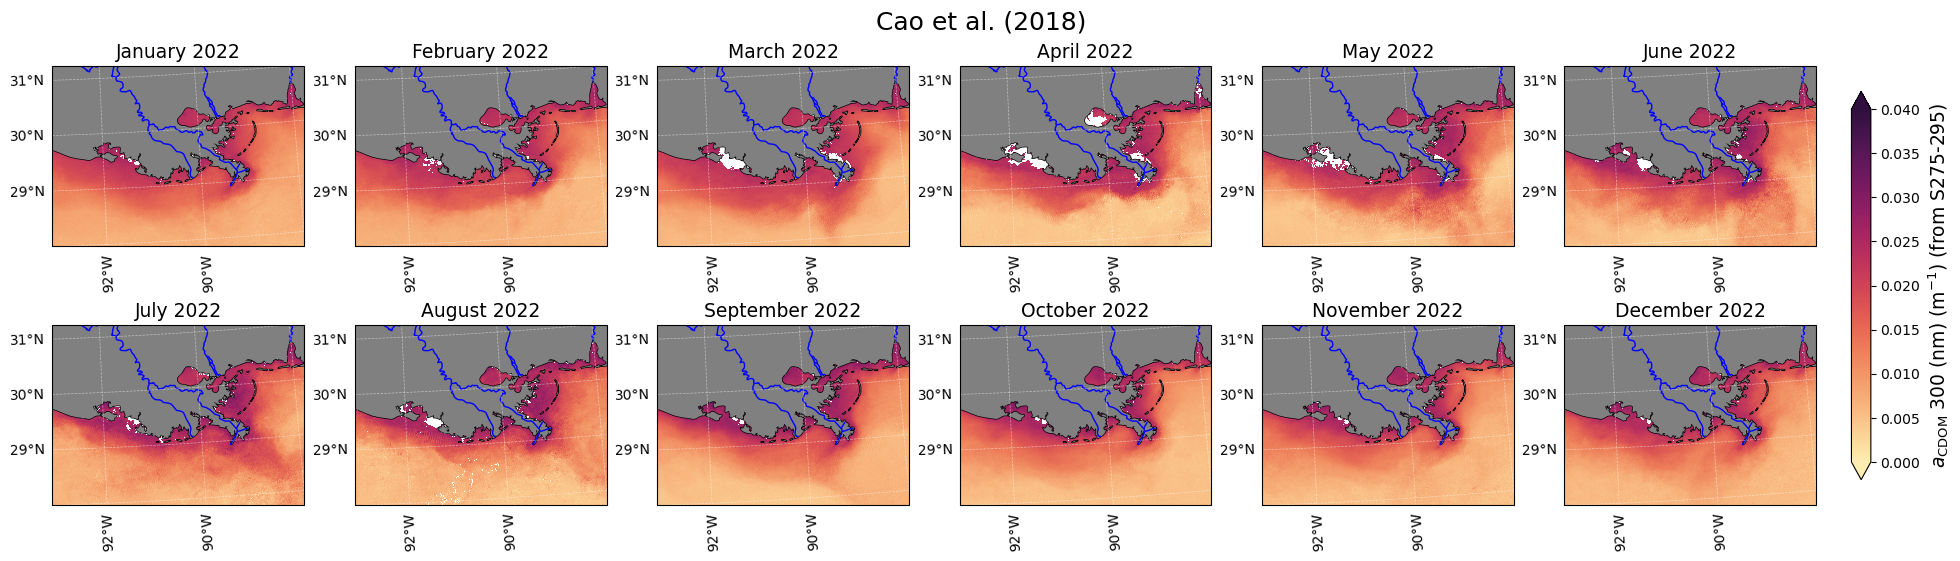

In [19]:
year = '2022'

if year == '2021':
    cfile = glob('/home/hboi-ouri/Projects/RS_Files/Task4/2021*MODIS_L2_aCDOM.nc')
    title = ['January 2021', 'February 2021', 'March 2021', 'April 2021', 'May 2021', 'June 2021',
             'July 2021', 'August 2021', 'September 2021', 'October 2021', 'November 2021', 'December 2021']
    
elif year == '2022':
    cfile = glob('/home/hboi-ouri/Projects/RS_Files/Task4/2022*MODIS_L2_aCDOM.nc')
    title = ['January 2022', 'February 2022', 'March 2022', 'April 2022', 'May 2022', 'June 2022',
         'July 2022', 'August 2022', 'September 2022', 'October 2022', 'November 2022', 'December 2022']

cfile.sort()

lat_top=31
lat_bot=28
lon_left=-93
lon_rigth=-88
extent=[lon_left, lon_rigth, lat_bot, lat_top]

resval = 1000 # resolution of the sat product (300 m for Sentinel and MERIS, 1 km for MODIS)
res = xr.DataArray(resval, attrs={"units": "meters"})

projection = ccrs.PlateCarree()
fig, axgr = plt.subplots(2, 6, constrained_layout=True, figsize=(19.5, 5.5),
                             subplot_kw={'projection':ccrs.LambertConformal()})
        

for i, ax in enumerate(axgr.flatten()):
    try:
        ds = xr.open_dataset(cfile[i])
        data = ds.aCDOM300_special.mean('time')

        im = data.where(data!=0).plot(ax=ax, vmin=0, vmax=0.04, 
                                      x='lon', y='lat', 
                                      add_colorbar=False,
                                     transform=ccrs.PlateCarree(),
                                     cmap=cmo.matter)
        ax.coastlines()
        ax.set_extent(extent)
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='land',
                                                    facecolor='grey', # change color here
                                                    scale='10m')) 
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='rivers_lake_centerlines',
                                                    edgecolor='blue', # change color here
                                                    facecolor='none',
                                                scale='10m'))
        gl = ax.gridlines(crs=ccrs.PlateCarree(),
             ylocs=[28, 29, 30, 31], 
             xlocs=[-94, -92, -90, -88], 
             draw_labels=True, linewidth=0.5, color='w', alpha=0.5, linestyle='--', x_inline=False, y_inline=False)
        gl.right_labels = False
        gl.top_labels = False
        ax.set_title(title[i], fontsize=13.5)
        ax.set_ylabel('Latitude')
        ax.set_xlabel('Longitude')
        
        
    except:
        ax.remove()
        pass
    
fig.suptitle('Cao et al. (2018)', size=18)
cb = fig.colorbar(im, ax=axgr, shrink=0.8, extend='both', pad=0.02)
cb.set_label('$a_{\mathrm{CDOM}}$ 300 (nm) (m$^{-1}$) (from S275-295)', size=13.5)
fig.savefig('/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Tasks/Task7/'+ year +'YearaCDOM300_special.png')